In [ ]:
# Single-cell RNA-seq analysis - resolution analysis

In [1]:
import scanpy as sc
import pandas as pd
import scanpy.external as sce
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
import matplotlib.font_manager
import numpy as np


import matplotlib


from optparse import OptionParser
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 #enables correct plotting of text
import math 
from tqdm import tqdm
font_size = 10
rc={'font.size': font_size, 'axes.labelsize': font_size, 'figure.dpi':400, 'axes.linewidth':1,
    'axes.titlesize': font_size, 'xtick.labelsize': font_size, 'ytick.labelsize': font_size} # 

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
os.chdir("/hsfscqjf1/ST_CQ/P23Z32300N0001/hemingmin/10.sc_merged1/results/2_scanpy_base_timepoint/")
adata_filter = sc.read_h5ad("cluster_raw.h5ad")

In [3]:
adata_filter

AnnData object with n_obs × n_vars = 126161 × 16122
    obs: 'seq_folder', 'nUMI', 'nGene', 'doublet_info', 'library', 'log10GenesPerUMI', 'mitoRatio', 'cells', 'sample', 'batch', 'timepoint', 'nCount_RNA', 'nFeature_RNA', 'leiden_res0.4', 'leiden_res0.5', 'leiden_res0.6', 'leiden_res0.8', 'leiden_res1'
    uns: 'hvg', 'leiden', 'leiden_res0.4_colors', 'leiden_res0.5_colors', 'leiden_res0.6_colors', 'leiden_res0.8_colors', 'leiden_res1_colors', 'log1p', 'neighbors', 'pca', 'tsne', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_tsne', 'X_umap'
    obsp: 'connectivities', 'distances'

/hsfscqjf2/ST_CQ/Reference/software/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


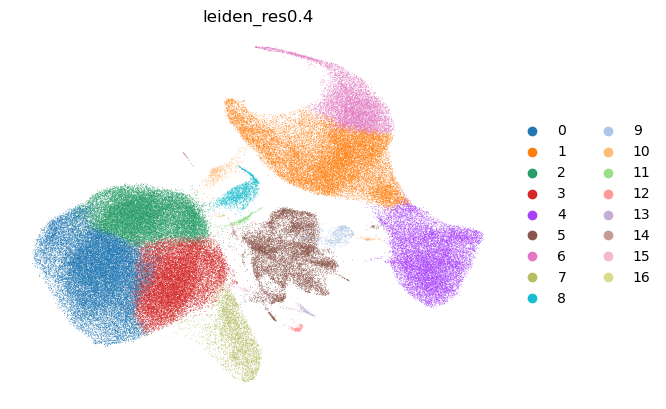

/hsfscqjf2/ST_CQ/Reference/software/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


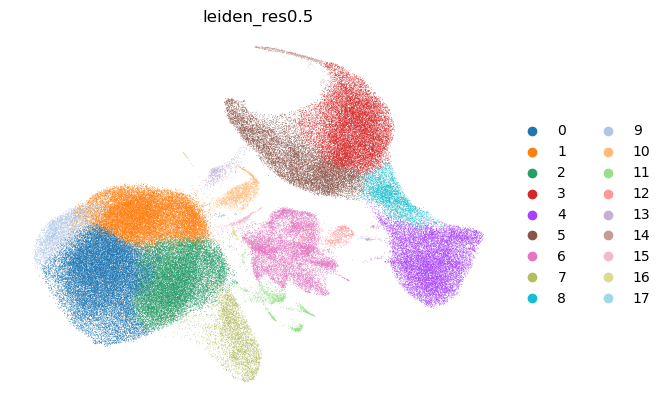

/hsfscqjf2/ST_CQ/Reference/software/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


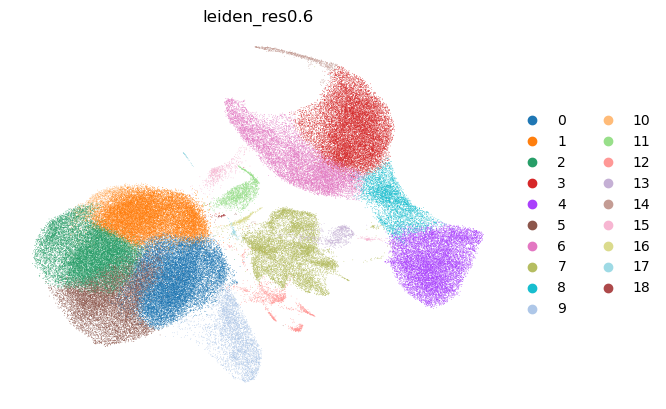

/hsfscqjf2/ST_CQ/Reference/software/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


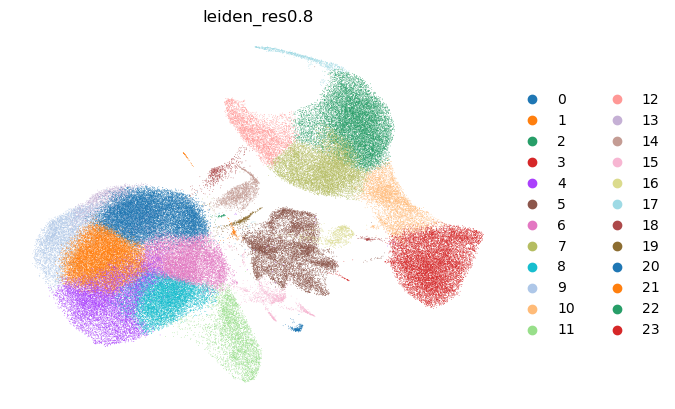

/hsfscqjf2/ST_CQ/Reference/software/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


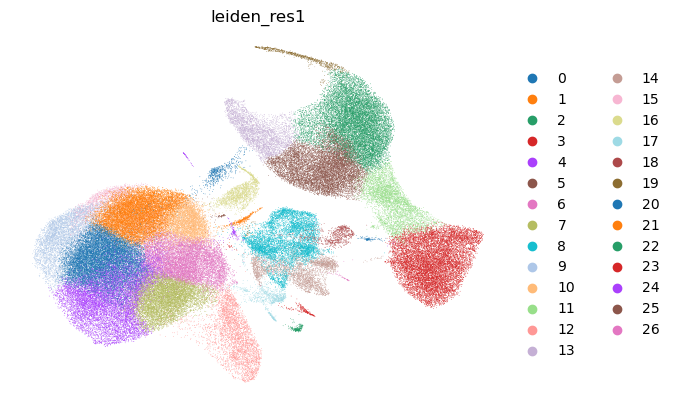

In [13]:
res=[0.4,0.5,0.6,0.8,1]
for j in res:
    sc.pl.umap(
        adata_filter, 
        color="leiden_res"+str(j),
        size=1,
       # legend_loc='on data',
        palette=sc.pl.palettes.default_20,
        wspace=0.3,
        ncols=1,
        title="leiden_res"+str(j),
        save = "leiden_res"+str(j)+"leiden_umap.pdf",
        frameon=False,
        show = True)
    

In [14]:
adata_filter.obs["cluster"]=adata_filter.obs["leiden_res0.4"]

In [15]:
adata_filter.raw = adata_filter
sc.pp.normalize_total(adata_filter, target_sum=1e4,inplace=True)
sc.pp.log1p(adata_filter)

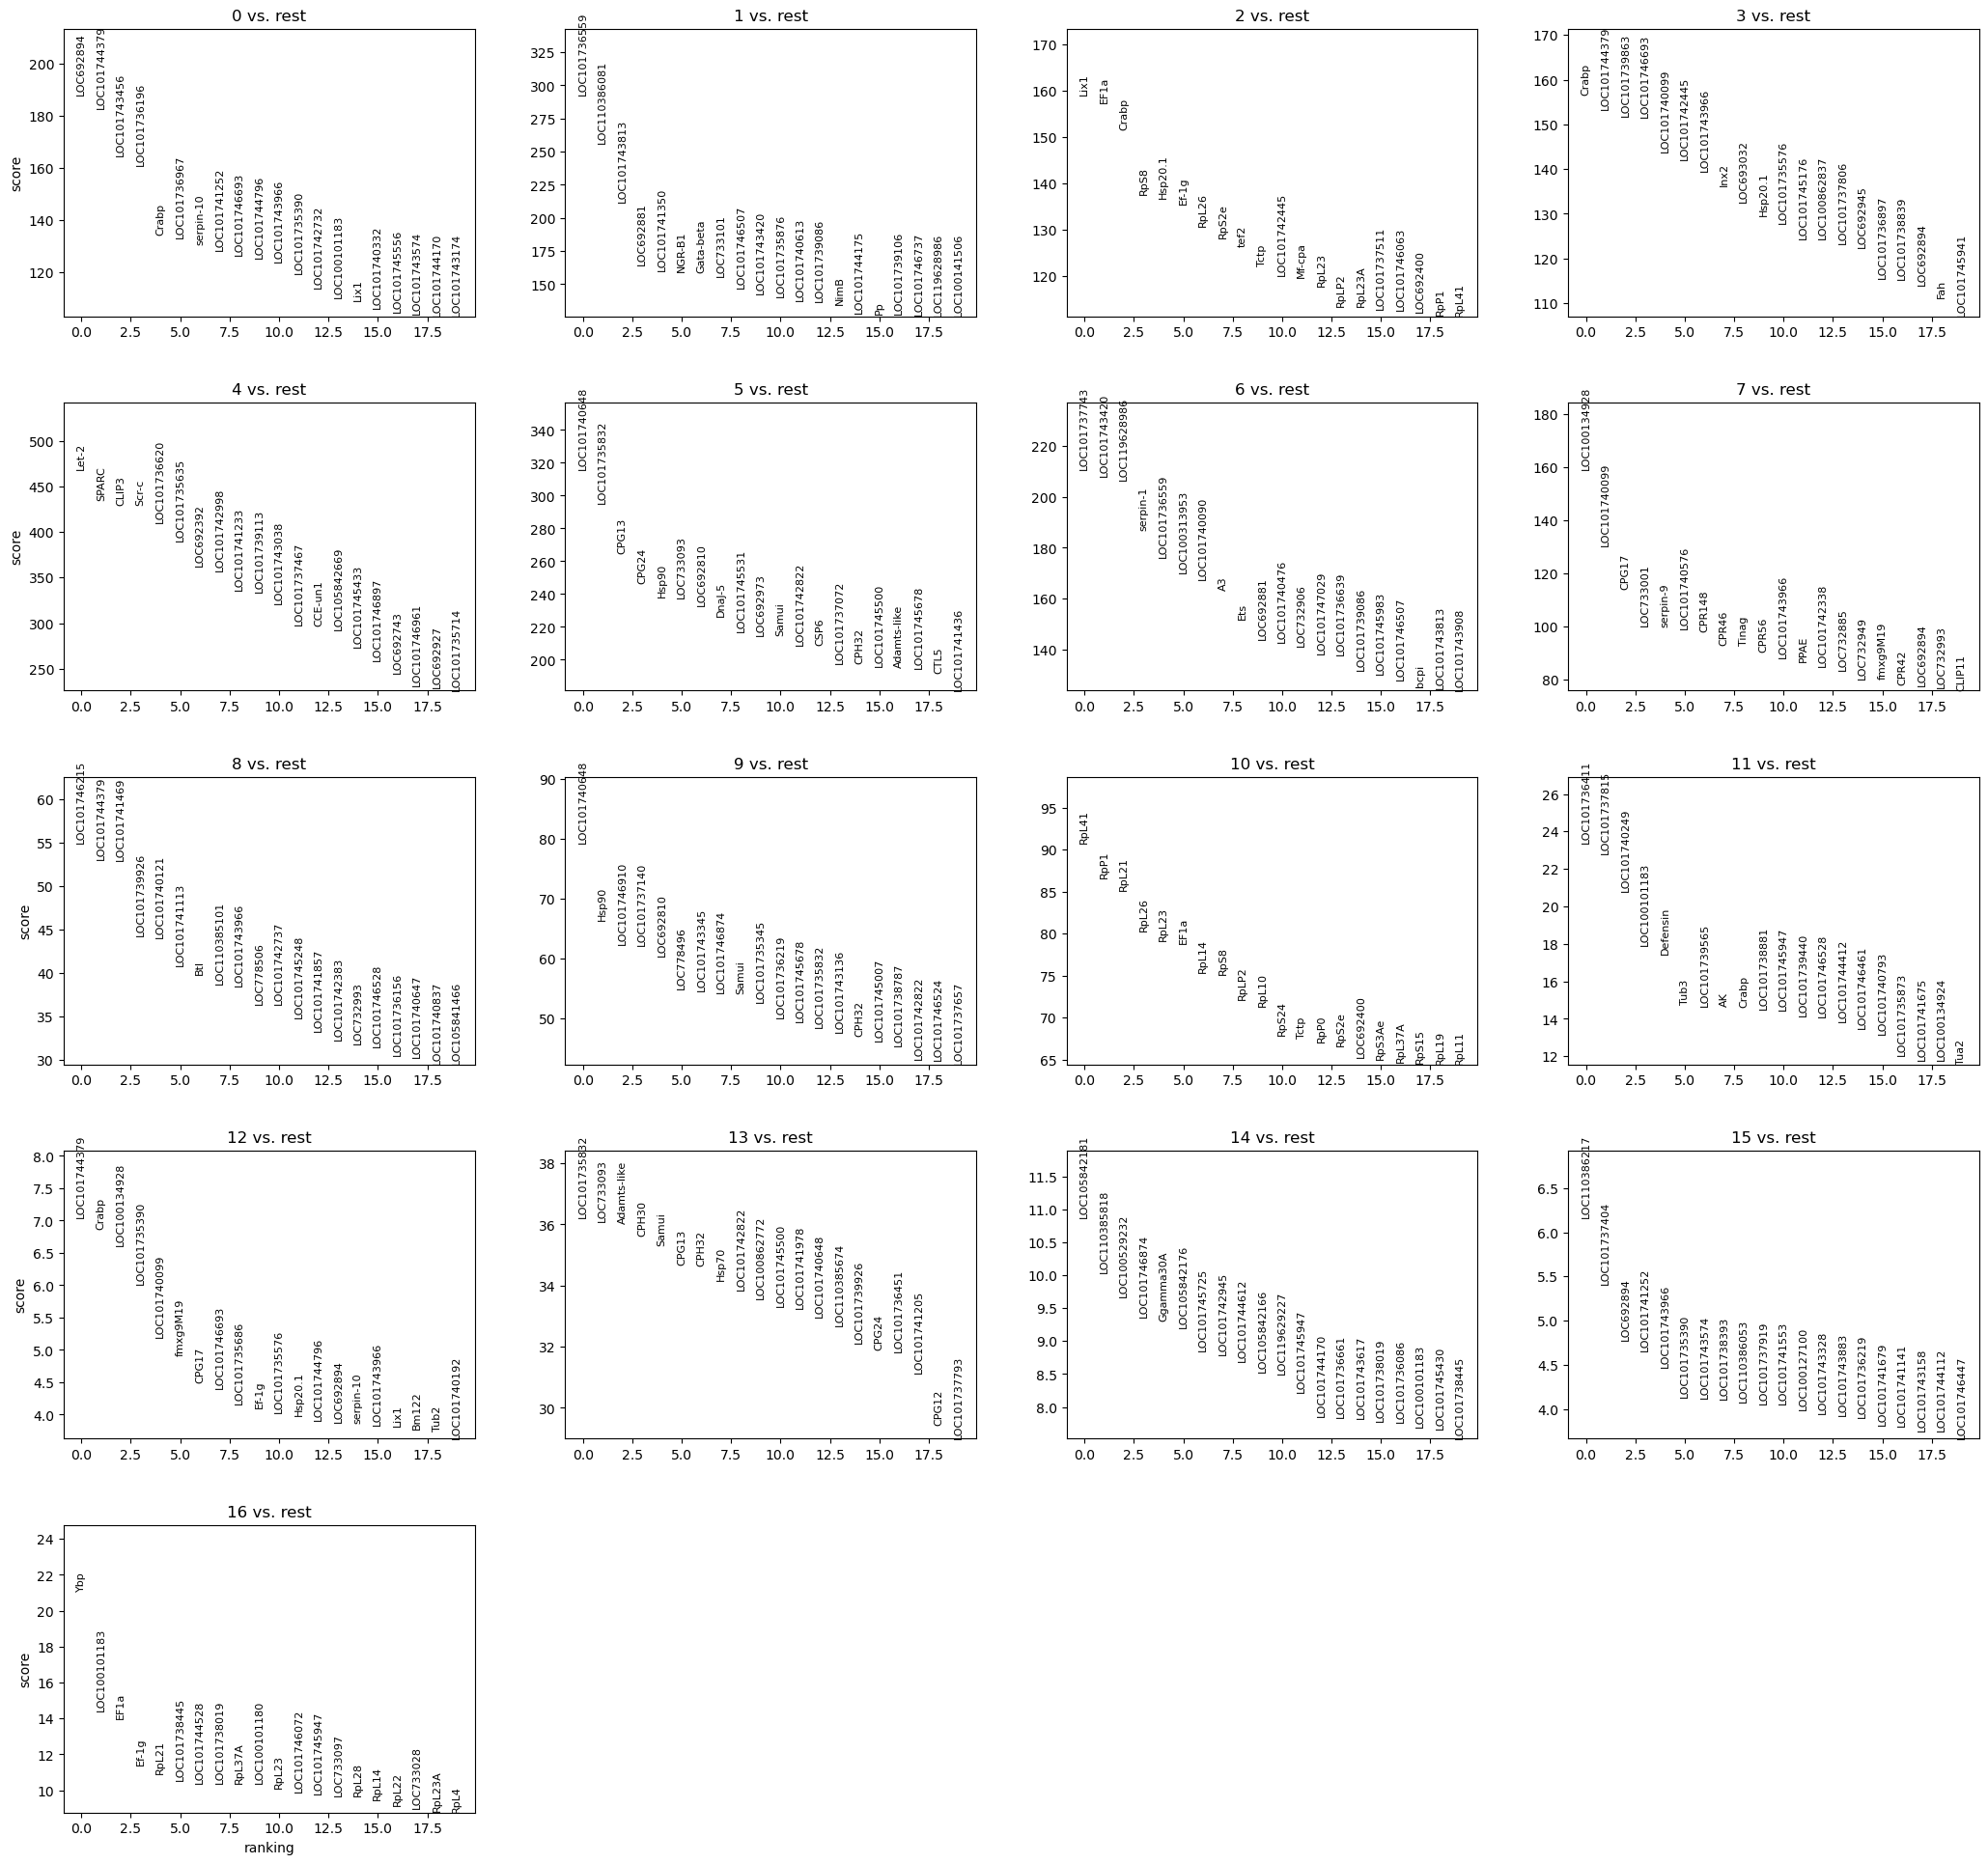

In [18]:
adata_filter.uns['log1p']['base']=None
sc.tl.rank_genes_groups(adata_filter, 'cluster', method='t-test',use_raw=False)
sc.pl.rank_genes_groups(adata_filter, n_genes=20, sharey=False,
                       save="rank_top20.pdf")
marker_top100=pd.DataFrame(adata_filter.uns['rank_genes_groups']['names']).head(100)
marker_top100.to_csv('sc_marker_top100.csv')

In [43]:
n_clusters = 17
log2fold_change = []
abs_log2fc = []
gene_names = []
pvals = []
pvals_adj = []
states = []
celltype=[]
scores=[]
for i in range(n_clusters):
    log2fold_change = log2fold_change + pd.DataFrame(adata_filter.uns['rank_genes_groups']['logfoldchanges'])[str(i)].tolist()
    abs_log2fc = abs_log2fc + abs(pd.DataFrame(adata_filter.uns['rank_genes_groups']['logfoldchanges']))[str(i)].tolist()
    gene_names = gene_names + pd.DataFrame(adata_filter.uns['rank_genes_groups']['names'])[str(i)].tolist()
    pvals = pvals+pd.DataFrame(adata_filter.uns['rank_genes_groups']['pvals'])[str(i)].tolist()
    pvals_adj = pvals_adj+pd.DataFrame(adata_filter.uns['rank_genes_groups']['pvals_adj'])[str(i)].tolist()
    scores = scores+pd.DataFrame(adata_filter.uns['rank_genes_groups']['scores'])[str(i)].tolist()
    
    states = states+[str(i)]*len(adata_filter.var)

rank_gene_T= { 'genes': gene_names,
             'log2fold_change':log2fold_change,
             'abs_log2fc':abs_log2fc,
             'pvals':pvals,
             'pvals_adj':pvals_adj,
             'cluster':states,
              'scores':scores
            } 


rank_gene_T = pd.DataFrame(data=rank_gene_T)

rank_gene_T.to_csv("All_subtype_rankgenes.csv")

In [19]:
adata_filter = adata_filter.raw.to_adata()
adata_filter.write("cluster_raw_rank.h5ad",compression='gzip')

In [20]:
# adata_filter.to_df()

/hsfscqjf2/ST_CQ/Reference/software/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


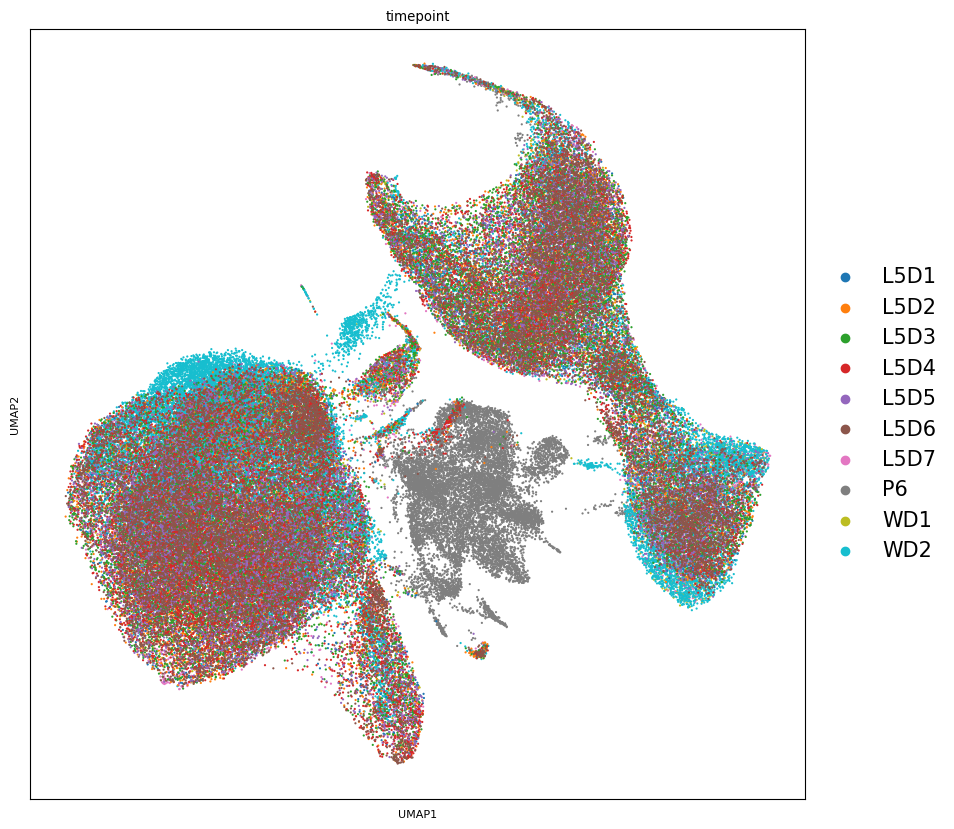

In [44]:
with plt.rc_context({'axes.facecolor':'white','figure.figsize': [10, 10]}):
    sc.pl.umap(adata_filter, color=['timepoint'], size=10,color_map = 'RdPu', ncols = 2,legend_fontsize=15,show=True,save="Cellcluster_timepoint.pdf")
        

/hsfscqjf2/ST_CQ/Reference/software/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


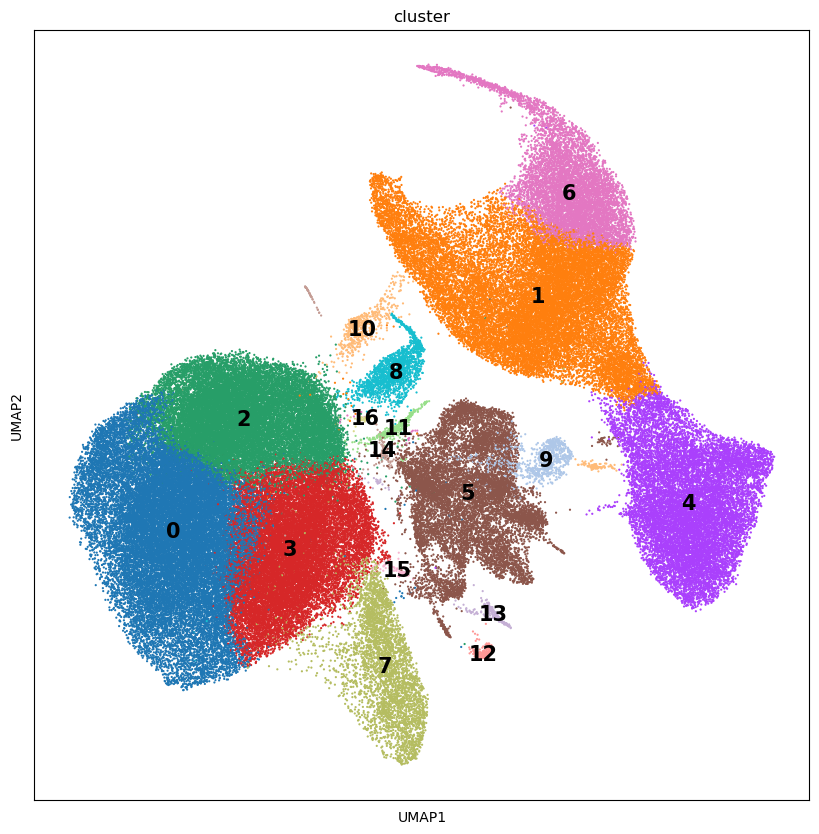

In [22]:
with plt.rc_context({'axes.facecolor':'white','figure.figsize': [10, 10]}):
    sc.pl.umap(adata_filter, color=['cluster'], size=10,color_map = 'RdPu', ncols = 2, legend_loc='on data',legend_fontsize=15,show=True,save="Cellcluster.pdf")
        

In [23]:
unique_sample = adata_filter.obs['timepoint'].unique()
subsets = {}
for group in unique_sample:
    subsets[group] = adata_filter[adata_filter.obs['timepoint'] == group]

In [26]:
with plt.rc_context({'axes.facecolor':'white','figure.figsize': [10, 10]}):
    sc.pl.tsne(adata_filter, color=['cluster'], size=10,color_map = 'RdPu', ncols = 2, legend_loc='on data',legend_fontsize=20,show=False,save="Cellcluster.pdf")
        

/hsfscqjf2/ST_CQ/Reference/software/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


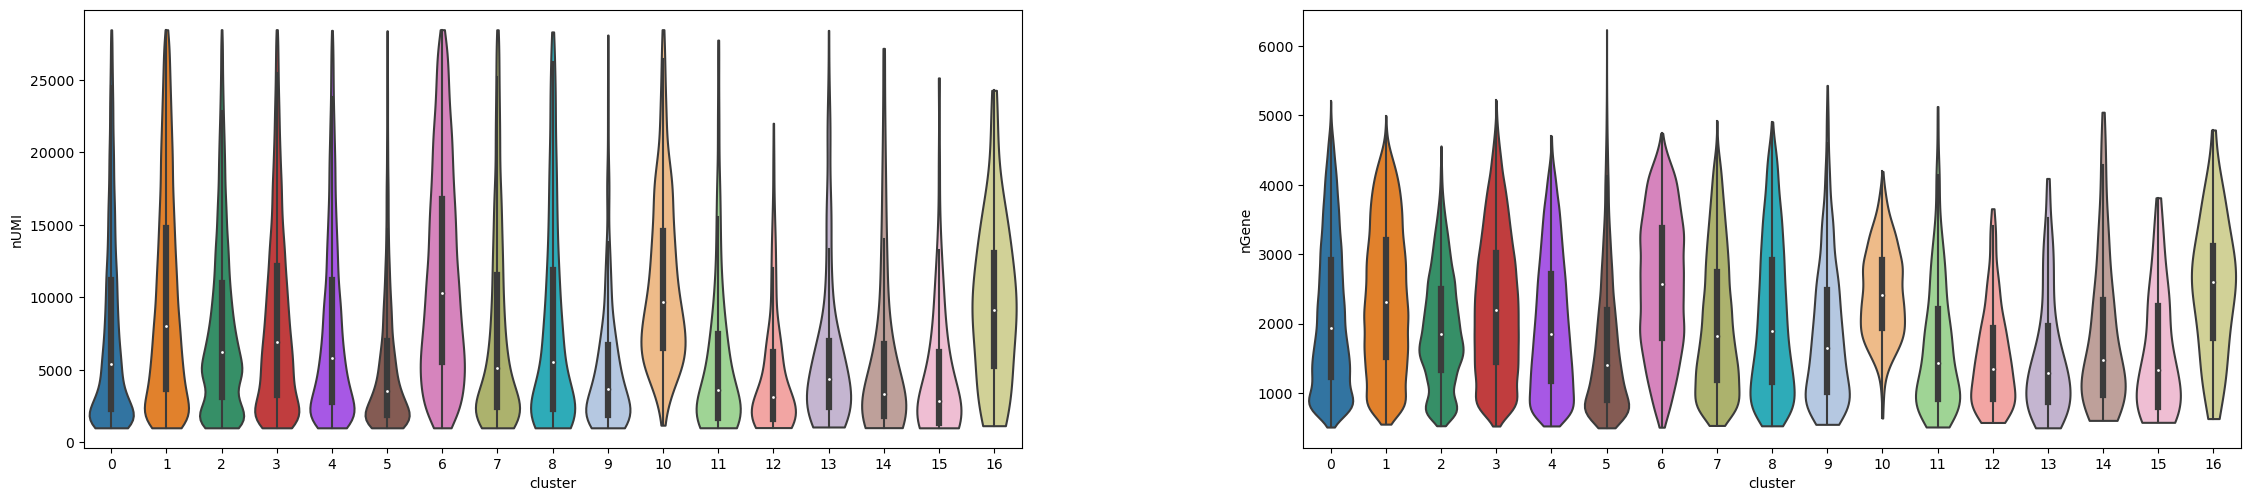

In [27]:
with plt.rc_context({'axes.facecolor':'white','figure.figsize': [10, 6]}):
    sc.pl.violin(adata_filter, ['nUMI', 'nGene'], groupby='cluster', stripplot=False, inner='box',save="Cellcluster_violin.pdf")  # use stripplot=False to remove the internal dots, inner='box' adds a boxplot inside violins

In [28]:
cellsCount = adata_filter.obs['cluster'].value_counts()
cellsRate = cellsCount/cellsCount.sum()*100
cellsdf = pd.concat([cellsCount, cellsRate], axis=1)
cellsdf.columns = ['count', 'rate']
cellsdf.to_csv(f"cell_count.tsv", sep="\t")

In [29]:
plt.figure(figsize=(12, 10))
cellsdf['count'].plot(kind = 'barh')
i = 0
sum = cellsdf['count'].sum()
for _, v in cellsdf['rate'].items():
    plt.text(sum*(v+2)/100, i, '%.2f' % v, ha='center', va='bottom', fontsize=11)
    i+=1
plt.savefig(f"cell_count.pdf")
plt.clf()

<Figure size 1200x1000 with 0 Axes>

  0%|          | 0/17 [00:00<?, ?it/s]

/hsfscqjf2/ST_CQ/Reference/software/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


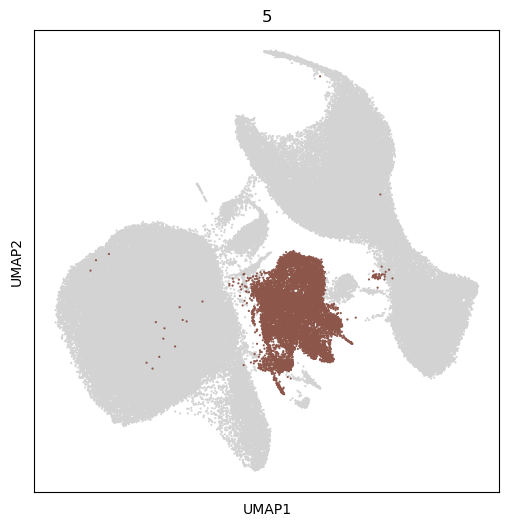

  6%|▌         | 1/17 [00:05<01:26,  5.40s/it]

/hsfscqjf2/ST_CQ/Reference/software/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


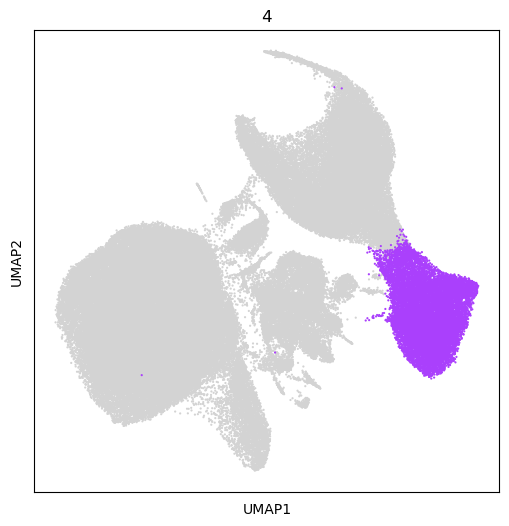

 12%|█▏        | 2/17 [00:10<01:20,  5.39s/it]

/hsfscqjf2/ST_CQ/Reference/software/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


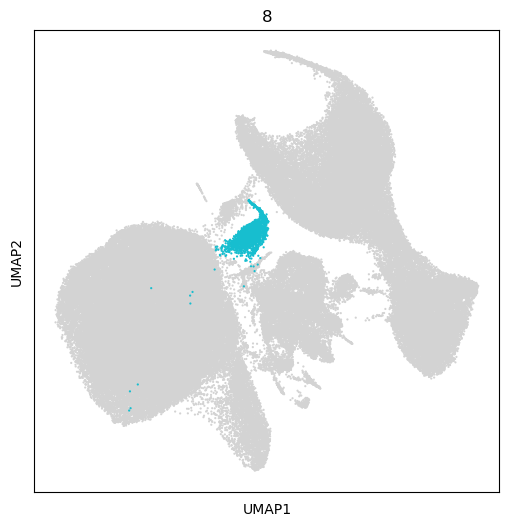

 18%|█▊        | 3/17 [00:16<01:14,  5.34s/it]

/hsfscqjf2/ST_CQ/Reference/software/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


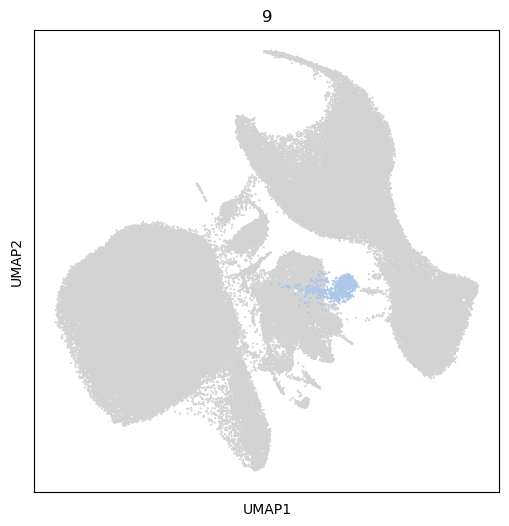

 24%|██▎       | 4/17 [00:21<01:09,  5.35s/it]

/hsfscqjf2/ST_CQ/Reference/software/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


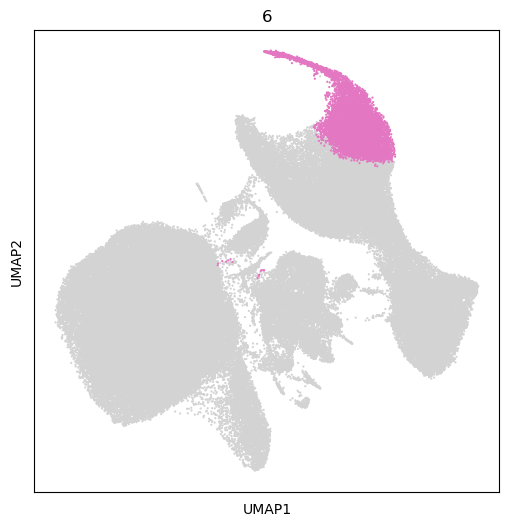

 29%|██▉       | 5/17 [00:26<01:04,  5.35s/it]

/hsfscqjf2/ST_CQ/Reference/software/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


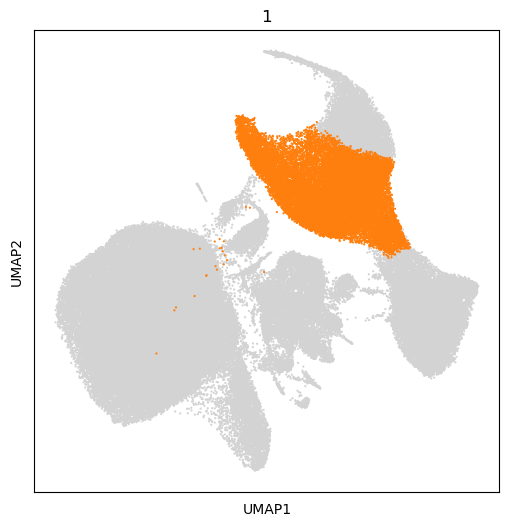

 35%|███▌      | 6/17 [00:32<00:59,  5.37s/it]

/hsfscqjf2/ST_CQ/Reference/software/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


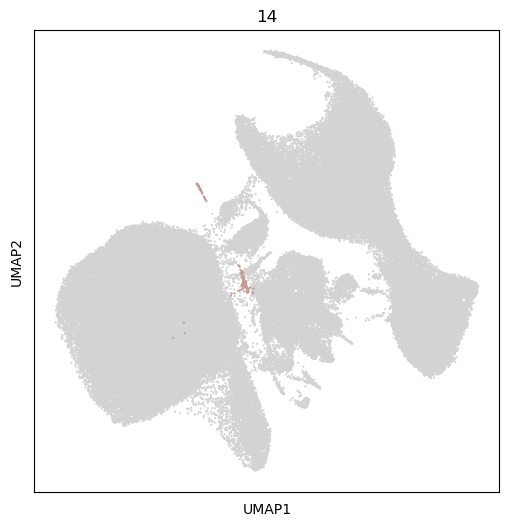

 41%|████      | 7/17 [00:37<00:53,  5.37s/it]

/hsfscqjf2/ST_CQ/Reference/software/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


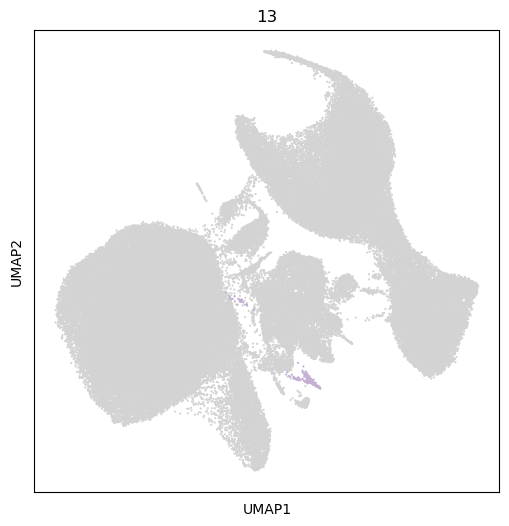

 47%|████▋     | 8/17 [00:42<00:48,  5.35s/it]

/hsfscqjf2/ST_CQ/Reference/software/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


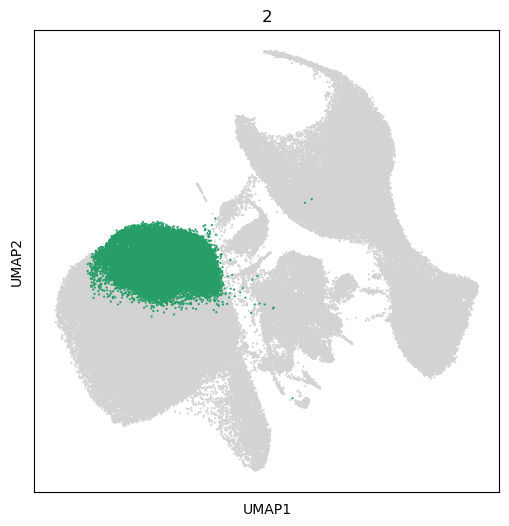

 53%|█████▎    | 9/17 [00:48<00:42,  5.37s/it]

/hsfscqjf2/ST_CQ/Reference/software/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


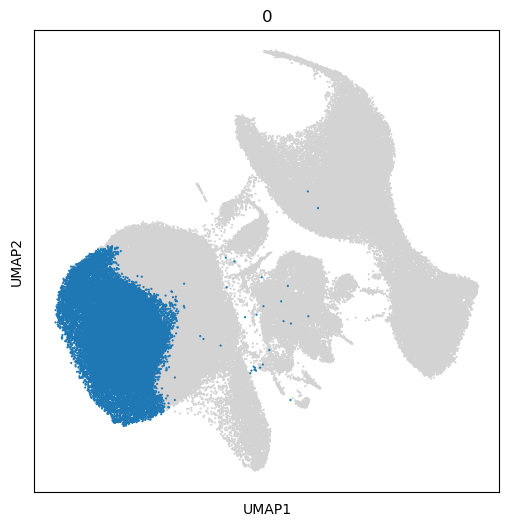

 59%|█████▉    | 10/17 [00:53<00:37,  5.37s/it]

/hsfscqjf2/ST_CQ/Reference/software/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


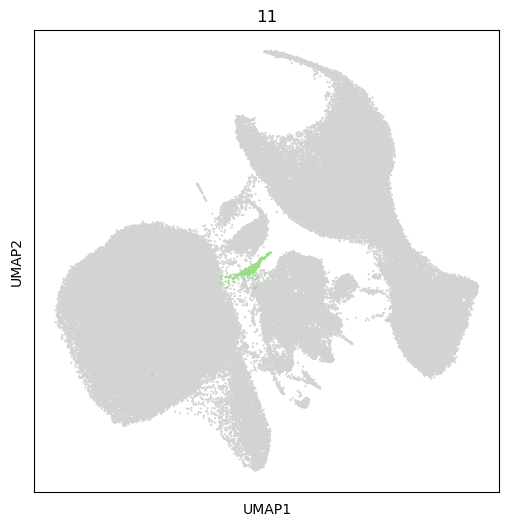

 65%|██████▍   | 11/17 [00:58<00:32,  5.36s/it]

/hsfscqjf2/ST_CQ/Reference/software/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


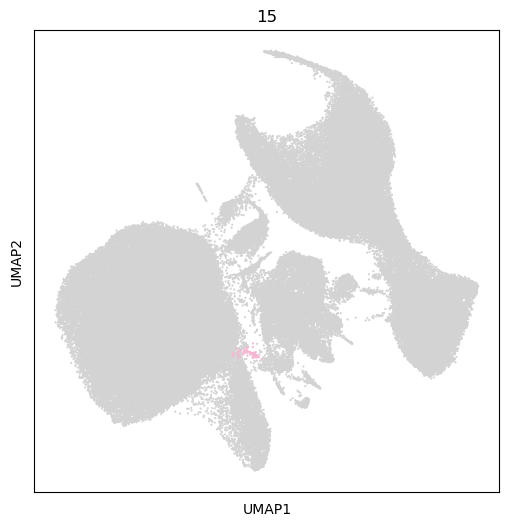

 71%|███████   | 12/17 [01:04<00:26,  5.39s/it]

/hsfscqjf2/ST_CQ/Reference/software/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


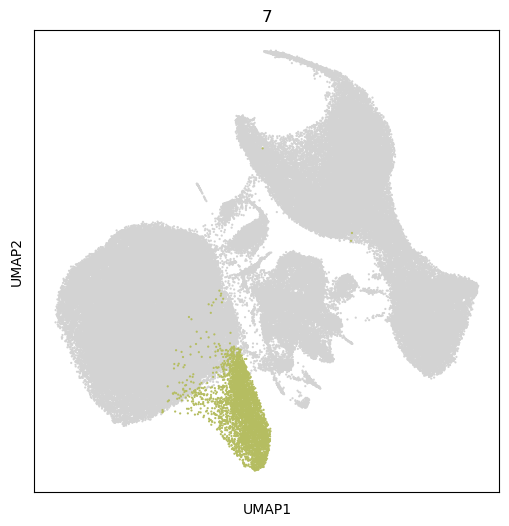

 76%|███████▋  | 13/17 [01:09<00:21,  5.39s/it]

/hsfscqjf2/ST_CQ/Reference/software/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


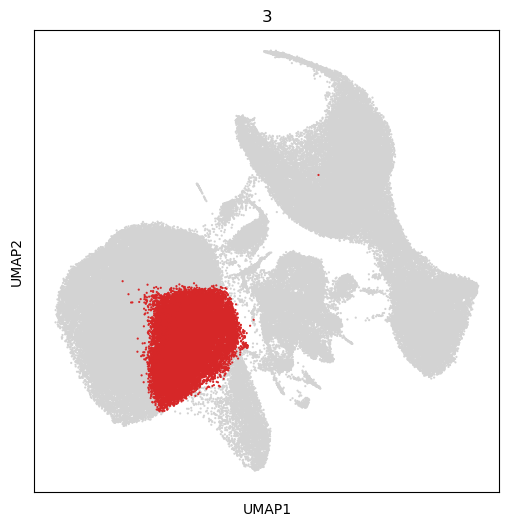

 82%|████████▏ | 14/17 [01:15<00:16,  5.41s/it]

/hsfscqjf2/ST_CQ/Reference/software/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


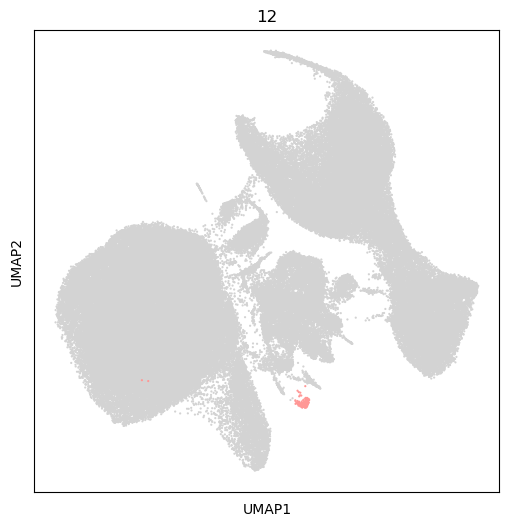

 88%|████████▊ | 15/17 [01:20<00:10,  5.37s/it]

/hsfscqjf2/ST_CQ/Reference/software/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


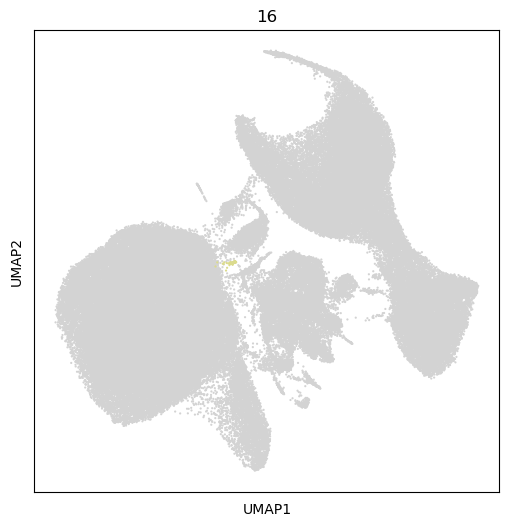

 94%|█████████▍| 16/17 [01:25<00:05,  5.35s/it]

/hsfscqjf2/ST_CQ/Reference/software/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


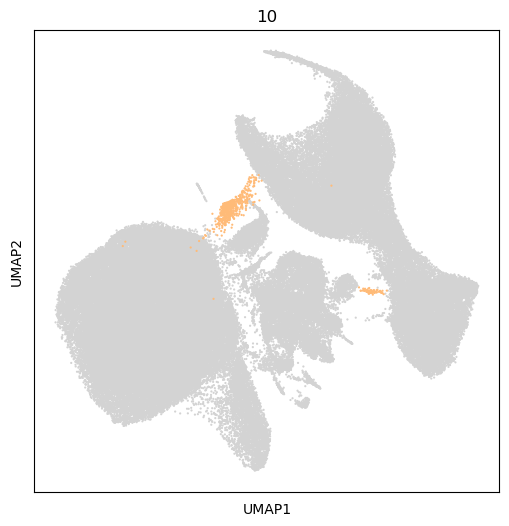

100%|██████████| 17/17 [01:31<00:00,  5.36s/it]


In [30]:
cells = adata_filter.obs['cluster'].unique()
for j in tqdm(range(len(cells))):
    cell = cells[j]
    with plt.rc_context({'axes.facecolor':'white','figure.figsize': [6, 6]}):
        sc.pl.umap(adata_filter, color=['cluster'], groups = [cell],color_map = 'RdPu',title=cell,size=10,show=True, legend_loc=None,save=cell+"Cellcluster.pdf")
    

/hsfscqjf2/ST_CQ/Reference/software/envs/st/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


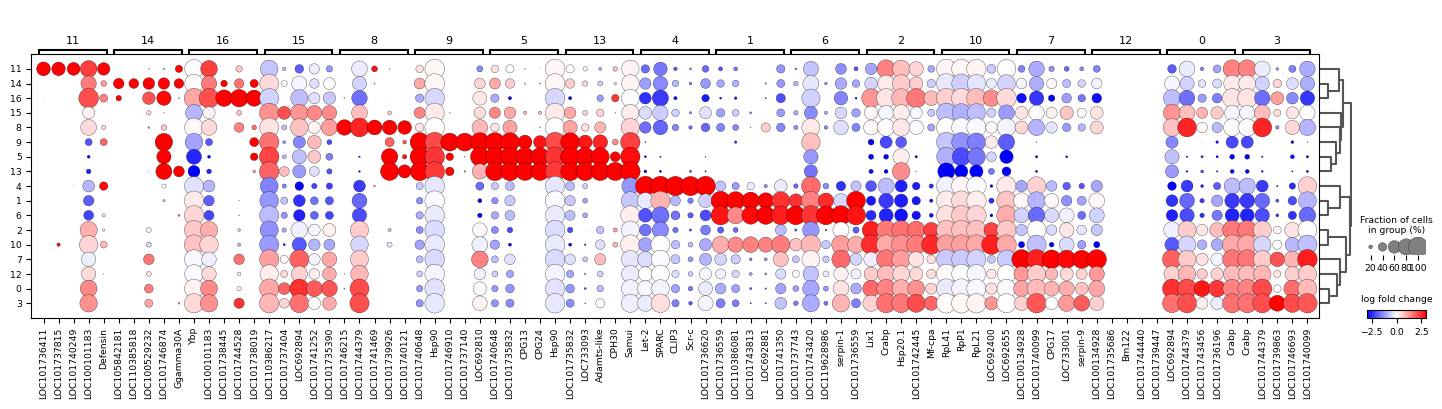

In [31]:
matplotlib.rcParams['font.size'] = 8
fig, ax = plt.subplots(1, 1,figsize=(18,4),gridspec_kw={'wspace':0.9})
sc.pl.rank_genes_groups_dotplot(adata_filter, n_genes=5,
                                values_to_plot='logfoldchanges',
                                min_logfoldchange=1, 
                                vmax=3, vmin=-3, 
                                # dot_max=1,
                                dot_min=0.1,
                                cmap='bwr',
                                ax=ax,
                               show=False)
plt.savefig("dotplot_top5.pdf",bbox_inches='tight')

In [32]:
sc.pp.scale(adata_filter)

In [33]:
# adata_filter.to_df()

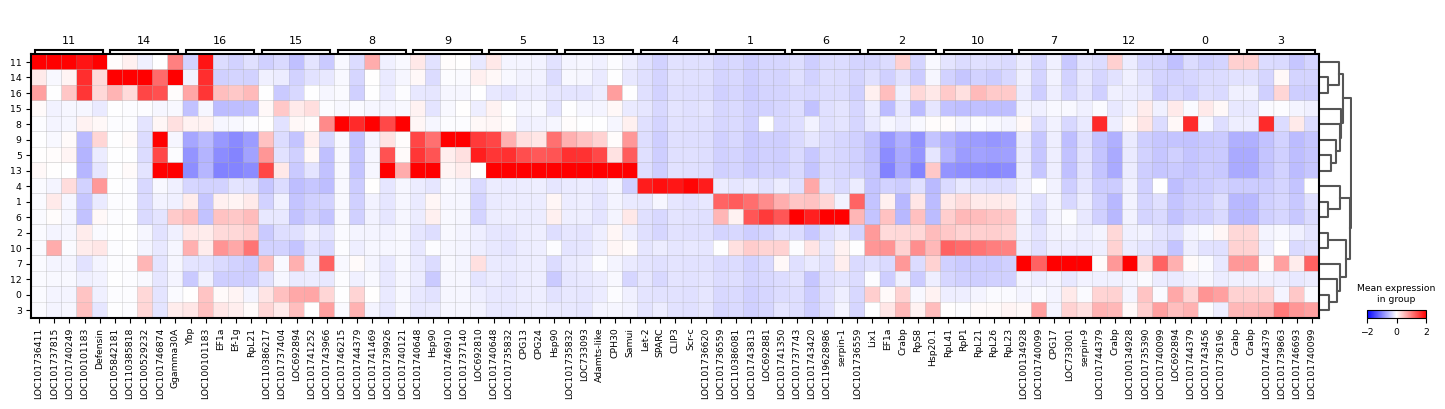

In [49]:
matplotlib.rcParams['font.size'] = 8
fig, ax = plt.subplots(1, 1,figsize=(18,4),gridspec_kw={'wspace':0.9})
sc.pl.rank_genes_groups_matrixplot(adata_filter, n_genes=5, use_raw=False, 
                                   vmin=-2, vmax=2, cmap='bwr', ax=ax,
                               show=False)
plt.savefig("matrixplott_top5.pdf",bbox_inches='tight')

In [35]:
adata_filter

AnnData object with n_obs × n_vars = 126161 × 16122
    obs: 'seq_folder', 'nUMI', 'nGene', 'doublet_info', 'library', 'log10GenesPerUMI', 'mitoRatio', 'cells', 'sample', 'batch', 'timepoint', 'nCount_RNA', 'nFeature_RNA', 'leiden_res0.4', 'leiden_res0.5', 'leiden_res0.6', 'leiden_res0.8', 'leiden_res1', 'cluster'
    var: 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_res0.4_colors', 'leiden_res0.5_colors', 'leiden_res0.6_colors', 'leiden_res0.8_colors', 'leiden_res1_colors', 'log1p', 'neighbors', 'pca', 'tsne', 'umap', 'rank_genes_groups', 'timepoint_colors', 'cluster_colors', 'dendrogram_cluster'
    obsm: 'X_pca', 'X_pca_harmony', 'X_tsne', 'X_umap'
    obsp: 'connectivities', 'distances'

In [38]:
sample_num=adata_filter.obs['sample'].value_counts()
labels=["WD501_2","WD502_1","WD503_1","WD504_1","WD505_2","WD506_1","S_WD507_1","S_WD_W1_3","WD2_W2","P6_2","P6_3"] # 排序
sample_num=sample_num.reindex(labels)

ct_df = adata_filter.obs[['cluster','sample']].value_counts(normalize=False).unstack('cluster')
ct_df = ct_df.reindex(labels)
ct_df = ct_df.fillna(0).div(sample_num,axis=0)
ct_df = ct_df[pd.DataFrame(ct_df.sum(axis=0)).index]



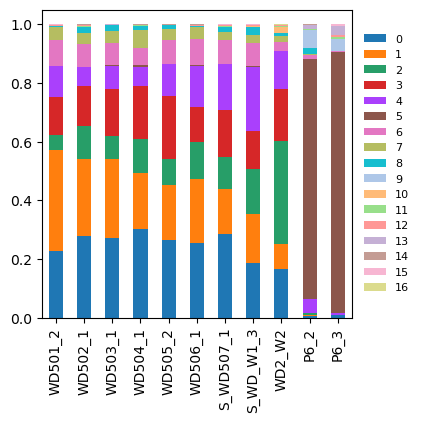

In [39]:
fig, ax = plt.subplots(figsize=(4, 4))
color=palette=sc.pl.palettes.default_20
ct_df.plot.bar(stacked=True,ax=ax,color=color)

plt.grid(False)
plt.legend(
    bbox_to_anchor=(1.2, 0.5),
    loc="right",
    borderaxespad=0,
    frameon=False,
    ncol=1,
)
plt.xlabel('')
plt.tick_params(labelsize=10)
plt.savefig("sample_subtype_ratio.pdf",bbox_inches = 'tight')

In [40]:
sample_num=adata_filter.obs['timepoint'].value_counts()
labels=["L5D1","L5D2","L5D3","L5D4","L5D5","L5D6","L5D7","WD1","WD2","P6"] # order
sample_num=sample_num.reindex(labels)

ct_df = adata_filter.obs[['cluster','timepoint']].value_counts(normalize=False).unstack('cluster')
ct_df = ct_df.reindex(labels)
ct_df = ct_df.fillna(0).div(sample_num,axis=0)
ct_df = ct_df[pd.DataFrame(ct_df.sum(axis=0)).index]



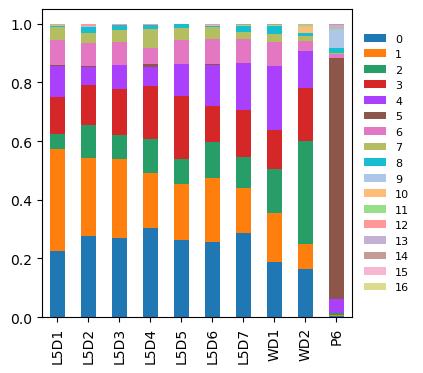

In [41]:
fig, ax = plt.subplots(figsize=(4, 4))
color=palette=sc.pl.palettes.default_20
ct_df.plot.bar(stacked=True,ax=ax,color=color)

plt.grid(False)
plt.legend(
    bbox_to_anchor=(1.2, 0.5),
    loc="right",
    borderaxespad=0,
    frameon=False,
    ncol=1,
)
plt.xlabel('')
plt.tick_params(labelsize=10)
plt.savefig("timepoint_subtype_ratio.pdf",bbox_inches = 'tight')